In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [3]:
df_train = pd.read_csv("InsNova_data_2023_train.csv", index_col='id')
df_test = pd.read_csv("InsNova_data_2023_vh.csv", index_col='id')

In [4]:
df_train.shape, df_test.shape

((22619, 21), (22620, 18))

In [5]:
pd.options.display.max_columns = None # Show all cols
df_train.describe()

,veh_value,exposure,veh_age,agecat,max_power,driving_history_score,e_bill,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
count,22619.000000,22619.000000,22619.000000,22619.000000,22619.000000,22619.000000,22619.00000,22619.000000,22619.000000,22619.000000,22619.000000,22619.000000,22619.000000
mean,1.868948,0.433038,2.667492,3.481675,152.447765,70.868341,0.63681,10.493833,649.875077,0.117114,0.068173,0.073124,163.048084
std,1.278588,0.272899,1.070555,1.420252,51.834156,19.083318,0.48093,2.601685,10.515364,0.321563,0.252048,0.280142,1271.955238
min,0.000000,0.001754,1.000000,1.000000,60.000000,1.000000,0.00000,6.000000,607.797435,0.000000,0.000000,0.000000,0.000000
25%,1.070000,0.203696,2.000000,2.000000,115.000000,58.000000,0.00000,6.000000,643.134748,0.000000,0.000000,0.000000,0.000000
50%,1.570000,0.384313,3.000000,3.000000,144.000000,72.000000,1.00000,12.000000,647.180197,0.000000,0.000000,0.000000,0.000000
75%,2.260000,0.643316,4.000000,5.000000,180.000000,86.000000,1.00000,12.000000,654.069205,0.000000,0.000000,0.000000,0.000000
max,24.510000,0.999378,4.000000,6.000000,409.000000,99.000000,1.00000,12.000000,790.360253,1.000000,1.000000,3.000000,57895.584560


In [6]:
df_train.shape

(22619, 21)

In [7]:
df_train

,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
id,,,,,,,,,,,,,,,,,,,,,
1,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,67.0,black,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.000000
2,4.45,0.562183,STNWG,1,M,A,3,petrol,158,76.0,white,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.000000
3,4.90,0.465244,STNWG,1,F,A,3,petrol,159,58.0,black,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.000000
4,0.48,0.271039,PANVN,4,M,A,4,petrol,80,72.0,white,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.000000
5,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,91.0,white,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,3.71,0.580943,STNWG,2,F,B,2,petrol,154,92.0,gray,M,1,weekday,6pm - 12am,12,654.451512,0.0,1,1,280.403348
22616,0.77,0.636641,SEDAN,4,F,C,6,petrol,160,74.0,white,M,1,weekday,12pm - 6pm,12,641.163999,0.0,0,0,0.000000
22617,1.95,0.709227,HBACK,1,M,C,6,petrol,146,58.0,black,M,1,weekday,12am - 6 am,12,649.644433,0.0,1,2,1253.261110


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22619 entries, 1 to 22619
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   veh_value              22619 non-null  float64
 1   exposure               22619 non-null  float64
 2   veh_body               22619 non-null  object 
 3   veh_age                22619 non-null  int64  
 4   gender                 22619 non-null  object 
 5   area                   22619 non-null  object 
 6   agecat                 22619 non-null  int64  
 7   engine_type            22619 non-null  object 
 8   max_power              22619 non-null  int64  
 9   driving_history_score  22619 non-null  float64
 10  veh_color              22619 non-null  object 
 11  marital_status         22619 non-null  object 
 12  e_bill                 22619 non-null  int64  
 13  time_of_week_driven    22619 non-null  object 
 14  time_driven            22619 non-null  object 
 15  tr

In [9]:
col_categories = ['veh_body', 'veh_age', 'gender', 'area',
                  'agecat', 'engine_type',
                  'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven',
                  'time_driven', 'trm_len', 'high_education_ind']

num_cols = [i for i in df_train.columns if i not in col_categories + ['claimcst0', 'clm', 'numclaims']]

In [10]:
num_cols

['veh_value', 'exposure', 'max_power', 'driving_history_score', 'credit_score']

In [11]:
label_encoder = OrdinalEncoder()
df_train[col_categories] = label_encoder.fit_transform(df_train[col_categories])

In [6]:
# df_train['agecat'] = label_encoder.fit_transform(df_train['agecat'])

In [7]:
# df_train['veh_age'] = label_encoder.fit_transform(df_train['veh_age'])

In [8]:
# df_train['veh_body'] = label_encoder.fit_transform(df_train['veh_body'])

In [9]:
# df_train['gender'] = label_encoder.fit_transform(df_train['gender'])

In [10]:
# df_train['area'] = label_encoder.fit_transform(df_train['area'])

In [11]:
# df_train['engine_type'] = label_encoder.fit_transform(df_train['engine_type'])

In [12]:
# df_train['veh_color'] = label_encoder.fit_transform(df_train['veh_color'])

In [13]:
# df_train['marital_status'] = label_encoder.fit_transform(df_train['marital_status'])

In [14]:
# df_train['time_of_week_driven'] = label_encoder.fit_transform(df_train['time_of_week_driven'])

In [15]:
# df_train['time_driven'] = label_encoder.fit_transform(df_train['time_driven'])

In [16]:
# df_train['high_education_ind'] = label_encoder.fit_transform(df_train['high_education_ind'])

In [17]:
# df_train['trm_len'] = label_encoder.fit_transform(df_train['trm_len'])

In [12]:
df_cont = df_train[["veh_value", "exposure", 
                  "driving_history_score", "credit_score", 'max_power']]

In [13]:
df_train.veh_age.unique(), df_train.agecat.unique(), df_train.e_bill.unique()


(array([3., 0., 2., 1.]), array([2., 3., 4., 1., 0., 5.]), array([1., 0.]))

In [14]:
df_train.trm_len.unique(), df_train.clm.unique(), df_train.numclaims.unique(), 

(array([0., 1.]), array([0, 1]), array([0, 1, 2, 3]))

In [15]:
df_train.high_education_ind.unique(), df_train.time_driven.unique()

(array([1., 0.]), array([3., 2., 1., 0.]))

In [16]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.reset_option("max_columns")
# pd.reset_option("max_rows")



In [17]:
df_cont.corr(numeric_only=True)

,veh_value,exposure,driving_history_score,credit_score,max_power
veh_value,1.000000,-0.000279,0.010630,-0.002800,0.190229
exposure,-0.000279,1.000000,-0.005429,-0.081266,-0.001208
driving_history_score,0.010630,-0.005429,1.000000,-0.003909,0.002779
credit_score,-0.002800,-0.081266,-0.003909,1.000000,0.002260
max_power,0.190229,-0.001208,0.002779,0.002260,1.000000


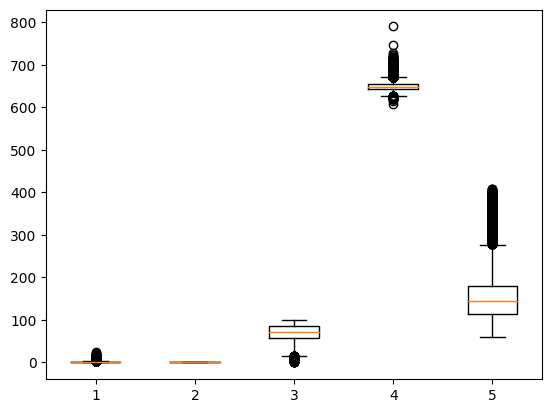

In [18]:
plt.boxplot(df_cont)
plt.show()

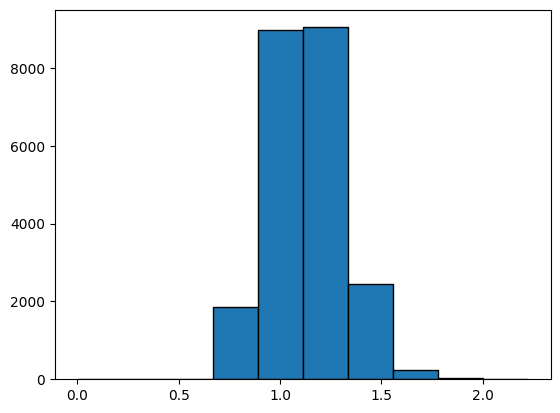

In [19]:
plt.hist((df_cont.veh_value ** (1/4)), edgecolor='k')
plt.show()

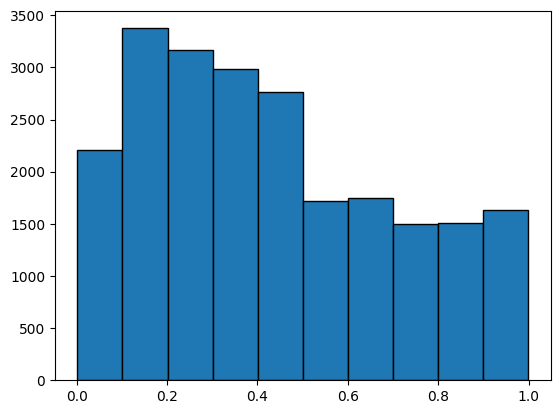

In [20]:
plt.hist((df_cont.exposure), edgecolor='k') # 'bar', 'barstacked', 'step', 'stepfilled'
plt.show()

In [21]:
scaler = MinMaxScaler()
print(scaler.fit(df_cont))
trans_dhs = scaler.transform(df_cont)

MinMaxScaler()


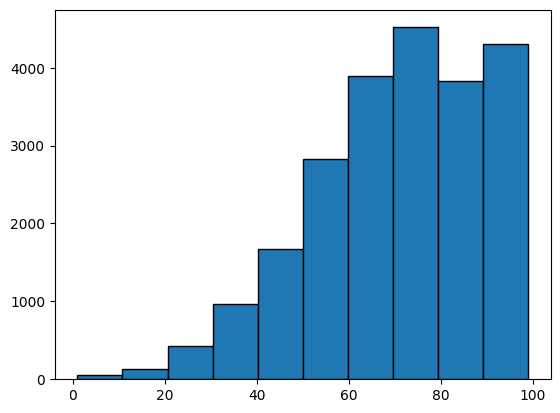

In [25]:
plt.hist(df_cont.driving_history_score, edgecolor='k')
plt.show()

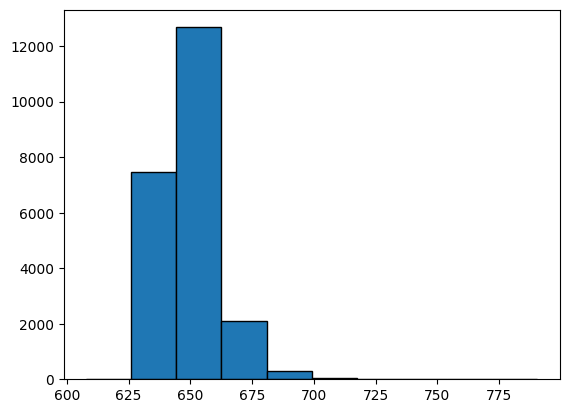

In [26]:
plt.hist(df_train.credit_score, edgecolor='k')
plt.show()

In [27]:
pd.set_option('display.max_columns', None)
df_train

,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
id,,,,,,,,,,,,,,,,,,,,,
1,0.181559,0.561764,9.0,3.0,1.0,3.0,2.0,3.0,147,67.0,0.0,1.0,1.0,0.0,3.0,0.0,640.448137,1.0,0,0,0.000000
2,0.199918,0.464594,10.0,0.0,1.0,0.0,2.0,3.0,158,76.0,7.0,1.0,1.0,0.0,2.0,1.0,683.749691,0.0,0,0,0.000000
3,0.019584,0.269926,10.0,0.0,0.0,0.0,2.0,3.0,159,58.0,0.0,0.0,1.0,0.0,3.0,0.0,653.656117,1.0,0,0,0.000000
4,0.034680,0.140203,7.0,3.0,1.0,0.0,3.0,3.0,80,72.0,7.0,1.0,1.0,0.0,1.0,1.0,642.574671,0.0,0,0,0.000000
5,0.055896,0.071516,9.0,3.0,0.0,0.0,4.0,3.0,126,91.0,7.0,1.0,0.0,0.0,2.0,0.0,647.175035,0.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,0.031416,0.636400,10.0,1.0,0.0,1.0,1.0,3.0,154,92.0,3.0,0.0,1.0,0.0,3.0,1.0,654.451512,0.0,1,1,280.403348
22616,0.079559,0.709158,9.0,3.0,0.0,2.0,5.0,3.0,160,74.0,7.0,0.0,1.0,0.0,1.0,1.0,641.163999,0.0,0,0,0.000000
22617,0.155039,0.599892,3.0,0.0,1.0,2.0,5.0,3.0,146,58.0,0.0,0.0,1.0,0.0,0.0,1.0,649.644433,0.0,1,2,1253.261110


In [28]:
df_train.high_education_ind.unique()

array([1., 0.])

In [29]:
var_cols = [c for c in df_train.columns if c not in ['clm', 'numclaims', 'claimcst0']]

In [30]:
X = df_train.loc[:, var_cols]
Y = df_train.loc[:, 'claimcst0']

In [31]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((18095, 18), (4524, 18), (18095,), (4524,))

In [33]:
X_train

,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind
id,,,,,,,,,,,,,,,,,,
9556,0.104855,0.596643,4.0,2.0,0.0,2.0,3.0,3.0,206,63.0,0.0,0.0,0.0,0.0,1.0,1.0,642.084367,0.0
7776,0.050592,0.134188,10.0,1.0,1.0,0.0,2.0,0.0,146,88.0,0.0,0.0,1.0,0.0,0.0,1.0,640.664960,0.0
8511,0.030600,0.100213,9.0,2.0,1.0,2.0,1.0,3.0,160,96.0,0.0,0.0,0.0,0.0,1.0,0.0,645.175316,0.0
19782,0.199918,0.225073,3.0,0.0,0.0,2.0,1.0,3.0,86,45.0,7.0,0.0,0.0,1.0,2.0,1.0,645.217578,0.0
14050,0.082007,0.506712,3.0,2.0,0.0,3.0,3.0,3.0,93,96.0,0.0,1.0,1.0,0.0,0.0,0.0,641.024920,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11965,0.064055,0.849530,2.0,3.0,0.0,2.0,2.0,3.0,248,39.0,7.0,0.0,1.0,0.0,1.0,1.0,641.290259,0.0
21576,0.044472,0.135010,10.0,3.0,0.0,5.0,1.0,0.0,156,59.0,7.0,0.0,0.0,0.0,2.0,0.0,643.685970,0.0
5391,0.135455,0.073281,3.0,0.0,0.0,2.0,3.0,3.0,156,61.0,8.0,1.0,1.0,0.0,1.0,1.0,648.437560,0.0


In [34]:
X_val

,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind
id,,,,,,,,,,,,,,,,,,
8295,0.066503,0.138208,10.0,0.0,1.0,0.0,2.0,0.0,146,55.0,0.0,1.0,1.0,0.0,1.0,1.0,644.091361,0.0
17624,0.109343,0.405345,9.0,2.0,0.0,2.0,2.0,0.0,196,61.0,0.0,1.0,1.0,1.0,2.0,1.0,639.406632,0.0
3802,0.055080,0.853360,11.0,0.0,1.0,1.0,1.0,0.0,393,68.0,1.0,0.0,0.0,1.0,1.0,1.0,684.541916,0.0
12865,0.092615,0.367331,10.0,0.0,1.0,1.0,3.0,3.0,192,86.0,2.0,0.0,1.0,0.0,2.0,0.0,650.389392,1.0
6495,0.033864,0.455943,9.0,2.0,0.0,2.0,3.0,3.0,113,63.0,7.0,1.0,1.0,0.0,1.0,1.0,649.220899,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16696,0.149327,0.116391,3.0,1.0,0.0,2.0,2.0,3.0,74,61.0,0.0,0.0,1.0,0.0,1.0,0.0,668.644938,0.0
21465,0.042432,0.660446,3.0,1.0,0.0,2.0,2.0,3.0,136,59.0,5.0,0.0,0.0,0.0,3.0,1.0,647.687266,0.0
18364,0.129743,0.479091,10.0,0.0,0.0,0.0,2.0,3.0,201,47.0,6.0,0.0,1.0,0.0,1.0,1.0,647.875357,0.0


In [36]:
X_t = X_train[['exposure', 'veh_value', 'credit_score', 'max_power', 'driving_history_score']]

In [37]:
X_v = X_val[['exposure', 'veh_value', 'credit_score', 'max_power', 'driving_history_score']]

In [38]:
X_v

,exposure,veh_value,credit_score,max_power,driving_history_score
id,,,,,
8295,0.138208,0.066503,644.091361,146,55.0
17624,0.405345,0.109343,639.406632,196,61.0
3802,0.853360,0.055080,684.541916,393,68.0
12865,0.367331,0.092615,650.389392,192,86.0
6495,0.455943,0.033864,649.220899,113,63.0
...,...,...,...,...,...
16696,0.116391,0.149327,668.644938,74,61.0
21465,0.660446,0.042432,647.687266,136,59.0
18364,0.479091,0.129743,647.875357,201,47.0


In [39]:
train_data = lgb.Dataset(X_t, label=Y_train)
val_data = lgb.Dataset(X_v, label=Y_val)

In [40]:
params = {'task': 'train',
         'objective': 'regression',
         'metric': ['l1', 'l2'],
         'boosting': 'gbdt',
         'num_leaves': 20,
         'feature_fraction': 0.5,
         'bagging_fraction': 0.7,
         'bagging_freq': 10,
         'learning_rate': 0.01,
         'early_stopping_round': 30,
         'verbose': 0,
         'max_depth': 8,
         'max_bin': 100,
         'num_iterations': 100000
         }

In [41]:
# model = lgb.LGBMRegressor(**params)

In [44]:
# model.fit(X_train, Y_train,
#          eval_set=[(X_val, Y_val)],
#          eval_metric='l1')

In [45]:
# y_pred = model.predict(X_train, num_iteration=model.best_iteration_)
# y_pred

In [57]:
# model_lgbm = lgb.train(params, 
#                        train_data,
#                        valid_sets=val_data,
#                        num_boost_round=5000)

In [58]:
# model_lgbm.best_score

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('l2', 1957153.0759874987)])})

In [ ]:
# lgb.plot_importance(model_lgbm, height=.5)

In [ ]:
# X_train[['exposure', 'id', 'veh_value', 'credit_score', 'max_power', 'driving_history_score']]

In [ ]:
# n_splits = 10
# kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [ ]:
# model_lgbm_cv = lgb.cv(params, 
#                        lgb.Dataset(X, label=Y),
#                        num_boost_round=5000,
#                        folds=kf.split(X),
#                        metrics='mse')